### Introduction au jeu de données
- Lien : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


In [14]:
# import des différentes librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline


In [15]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df = df.fillna(value= 'No Sleep Disorder')

#### Etude primitive du jeu de données
- 13 colonnes et 374 lignes : un petit jeu de données
- 7 colonnes avec des valeurs de type entier, 5 de type de texte et 1 de type arrondi
- la colonne *"Blood Pressure"* pourrait être diviser en deux variables de type entier, une Systolic et une Diastolic
- à première vue, il n'y a pas de valeurs abberantes (describe)
- dans la colonne *'Sleep Disorder'*, des NaN ont été mis pour dire que le sujet n'a pas de trouble du sommeil, cela peut porter à confusion donc remplacer par 'No Sleep Disorder'
- des NaN que dans la colonne *'Sleep Disorder'* donc on va remplacer les valeurs manquantes avec la méthode fillna sur le dataset
- pas de doublons
- autant d'homme que de femme dans l'échantillon, des métiers assez premium (sauf vendeur) et plus de personnes sans troubles du sommeil(58%), avec de l'apnée (21%) et avec de l'insomnie (21%)

In [ ]:
#séparer la colonne blood pressure en deux variables plus interprétable par la suite
df[['Systolic','Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

#convertir les deux variables de type object en type numérique
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

#supprimer la colonne blood pressure qui n'a plus d'intérêt
df.drop(['Blood Pressure','Person ID'], axis = 1, inplace= True)

In [ ]:
# création de nouvelles variables 
# ratio_sleep_activity : Cela pourrait indiquer l'équilibre entre le repos et l'activité.
df['Ratio_Sleep_Activity'] = np.round(df['Sleep Duration']/df['Physical Activity Level'],3)

#différence systolique - diastolique : indicateur de la pression pulsée
df['Diff_Systolic_Diastolic'] = df['Systolic'] - df['Diastolic']

#catégoriser l'âge
df['cat_age'] = pd.cut(df['Age'], bins = [0,18,30,50,65,100], labels = ['Enfant','Jeunes_adultes','Adultes_en_milieu_de_vie','Adultes_plus_âgés','Seniors'])

### DataVisualisation
##### Analyser la corrélation entre les variables numériques :
- *Sleep Duration* et *Quality of Sleep* sont fortement corrélés **(0.88)** donc peut être en sortir qu'un indice combiné des deux
- La *quality of sleep* / *sleep* duration sont fortement corrélés négativement **(-0.81 et -0.9)** avec le Stress Level 
- *Daily steps* et *Physical Activity Level* sont fortement corrélés **(0.77)** donc peut être en sortir qu'un indice combiné des deux
- *Systolic* et *Diastolic* sont fortement corrélés **(0.97)** donc garder que la différence semble être une bonne solution

for col in df.select_dtypes('object').columns:
    plt.figure()
    plt.pie(df[col].value_counts(), autopct= '%.f%%')
    plt.legend(df[col].value_counts().index,bbox_to_anchor=(1, 1))

for col in df.select_dtypes(['int','float']).columns:
    plt.figure()
    sns.boxplot(data = df, x = col)

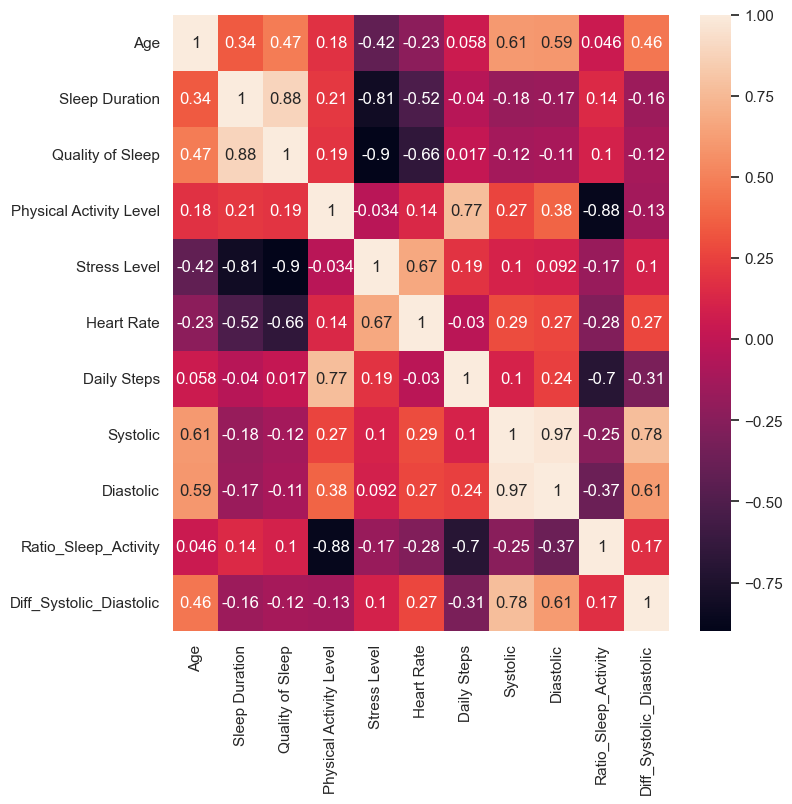

In [96]:
plt.figure(figsize = (8,8))
sns.heatmap(df.select_dtypes(['int','float']).corr(), annot = True);

In [86]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Ratio_Sleep_Activity,Diff_Systolic_Diastolic,cat_age
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126,83,0.145,43,Jeunes_adultes
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80,0.103,45,Jeunes_adultes
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80,0.103,45,Jeunes_adultes
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,0.197,50,Jeunes_adultes
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,0.197,50,Jeunes_adultes
